In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import ptitprince as pt
import matplotlib.collections as clt


In [2]:

%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

## SOURCE CONTROLLED ACCURACY AND REACTION TIMES FOR INFERENCE

## Load Data sheets

In [3]:
## INFERENCE!
src_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_inference.csv')
src_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/srcAB3BC_inference.csv')
src_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/srcAB3BC_inference.csv')
src_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/srcAB3BC_inference.csv')

src_exp_1.columns = src_exp_1.columns.str.replace(" ", "_")
src_exp_2.columns = src_exp_2.columns.str.replace(" ", "_")
src_exp_3.columns = src_exp_3.columns.str.replace(" ", "_")
src_exp_4.columns = src_exp_4.columns.str.replace(" ", "_")

##Reaction Time!!
src_rt_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_rt.csv')
src_rt_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/srcAB3BC_rt.csv')
src_rt_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/srcAB3BC_rt.csv')
src_rt_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/srcAB3BC_rt.csv')

src_rt_exp_1.columns = src_rt_exp_1.columns.str.replace(" ", "_")
src_rt_exp_2.columns = src_rt_exp_2.columns.str.replace(" ", "_")
src_rt_exp_3.columns = src_rt_exp_3.columns.str.replace(" ", "_")
src_rt_exp_4.columns = src_rt_exp_4.columns.str.replace(" ", "_")

In [4]:
val_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_inference_valence.csv')
val_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/overall_inference_valence.csv')
val_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/overall_inference_valence.csv')
val_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/overall_inference_valence.csv')

val_exp_1.columns = val_exp_1.columns.str.replace(" ", "_")
val_exp_2.columns = val_exp_2.columns.str.replace(" ", "_")
val_exp_3.columns = val_exp_3.columns.str.replace(" ", "_")
val_exp_4.columns = val_exp_4.columns.str.replace(" ", "_")

##Reaction Time!!
val_rt_exp_1 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_RT_valence.csv')
val_rt_exp_2 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/summaryXYdata/overall_RT_valence.csv')
val_rt_exp_3 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/HA_summary/overall_RT_valence.csv')
val_rt_exp_4 = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mturk_pavlovia_data/SEQ_summary/overall_RT_valence.csv')

val_rt_exp_1.columns = val_rt_exp_1.columns.str.replace(" ", "_")
val_rt_exp_2.columns = val_rt_exp_2.columns.str.replace(" ", "_")
val_rt_exp_3.columns = val_rt_exp_3.columns.str.replace(" ", "_")
val_rt_exp_4.columns = val_rt_exp_4.columns.str.replace(" ", "_")

In [5]:
exp_1 = pd.merge(val_exp_1, src_exp_1, on="participant")
rt_exp_1 = pd.merge(val_rt_exp_1, src_rt_exp_1, on="participant")

In [6]:
exp_2 = src_exp_2
exp_3 = src_exp_3
exp_4 = src_exp_4

In [7]:
stacked_exp1 = pd.melt(exp_1, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_AC_y', 'Avg_AC_emo_y', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='Total_acc')
stacked_exp2 = pd.melt(exp_2, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp3 = pd.melt(exp_3, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp4 = pd.melt(exp_4, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')

stacked_exp1 ['ExpNum'] = '1'
stacked_exp2 ['ExpNum'] = '2'
stacked_exp3 ['ExpNum'] = '3'
stacked_exp4 ['ExpNum'] = '4'

mrg_experiments= [stacked_exp1, stacked_exp2, stacked_exp3, stacked_exp4]
experiments = pd.concat(mrg_experiments)
experiments

# rt_stacked_exp1 = pd.melt(rt_exp_1, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_AC_y', 'Avg_AC_emo_y', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='RT')
# rt_stacked_exp2 = pd.melt(rt_exp_2, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
# rt_stacked_exp3 = pd.melt(rt_exp_3, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
# rt_stacked_exp4 = pd.melt(rt_exp_4, id_vars=['participant'], value_vars=['Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')

# rt_stacked_exp1 ['ExpNum'] = '1'
# rt_stacked_exp2 ['ExpNum'] = '2'
# rt_stacked_exp3 ['ExpNum'] = '3'
# rt_stacked_exp4 ['ExpNum'] = '4'
# rt_mrg_experiments= [rt_stacked_exp1, rt_stacked_exp2, rt_stacked_exp3, rt_stacked_exp4]
# rt_experiments = pd.concat(rt_mrg_experiments)
# rt_experiments

,participant,condition,Total_acc,ExpNum
0,A0017268R9SKD8U2Y3F,Avg_BC,0.833333,1
1,A12HWPFXQPITHD,Avg_BC,0.666667,1
2,A14WLAP6TCEKO0,Avg_BC,0.277778,1
3,A16G6PPH1INQL8,Avg_BC,0.541667,1
4,A1C5SQZ045W0L5,Avg_BC,0.782609,1
...,...,...,...,...
247,A2V8CV9H3U2M5P,Avg_AC_emo,0.500000,4
248,A35KSAHOAK9CAI,Avg_AC_emo,0.166667,4
249,A4158R4Y06ZB4,Avg_AC_emo,0.750000,4
250,ATOV0H5KQHI29,Avg_AC_emo,0.461538,4


## MAIN Data figure: BCXY and AC

In [8]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

#fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

experiments.loc[experiments['condition'] == 'Avg_AB3', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_XY', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_AC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_AC_y', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'valence'] = 'c-neutral'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_AC_emo_y', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'valence'] = 'fearful'


experiments.loc[experiments['condition'] == 'Avg_AB3', 'Test'] = '1-Initial learning (AB)'
experiments.loc[experiments['condition'] == 'Avg_BC', 'Test'] = '2-Overlapping pairs (BC)'
experiments.loc[experiments['condition'] == 'Avg_XY', 'Test'] = '3-Non-overlapping pairs (XY)'
experiments.loc[experiments['condition'] == 'Avg_AC', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_AC_y', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'Test'] = 'Final AB test'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'Test'] = 'Final BC test'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'Test'] = '1-Initial learning'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'Test'] = '2-Overlapping pairs (BC)'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'Test'] = '3-Non-overlapping pairs (XY)'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_AC_emo_y', 'Test'] = '4-Inference (AC)'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'Test'] = 'Final AB test'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'Test'] = 'Final BC test'

exp1 = experiments.loc[experiments['ExpNum'] == '1']
exp2 = experiments.loc[experiments['ExpNum'] == '2']
exp3 = experiments.loc[experiments['ExpNum'] == '3']
exp4 = experiments.loc[experiments['ExpNum'] == '4']

AB3 = experiments.loc[experiments['Test'] == '1-Initial learning (AB)']
BC = experiments.loc[experiments['Test'] == '2-Overlapping pairs (BC)']
XY = experiments.loc[experiments['Test'] == '3-Non-overlapping pairs (XY)']
AC = experiments.loc[experiments['Test'] == '4-Inference (AC)']
FinalAB = experiments.loc[experiments['Test'] == 'Final AB test']
FinalBC = experiments.loc[experiments['Test'] == 'Final BC test']



In [9]:

### BC
BCexp1_neu = exp1.loc[exp1['condition'] == 'Avg_BC']
BCexp2_neu = exp2.loc[exp2['condition'] == 'Avg_BC']
BCexp3_neu = exp3.loc[exp3['condition'] == 'Avg_BC']
BCexp4_neu = exp4.loc[exp4['condition'] == 'Avg_BC']

BCexp1_emo = exp1.loc[exp1['condition'] == 'Avg_BC_emo']
BCexp2_emo = exp2.loc[exp2['condition'] == 'Avg_BC_emo']
BCexp3_emo = exp3.loc[exp3['condition'] == 'Avg_BC_emo']
BCexp4_emo = exp4.loc[exp4['condition'] == 'Avg_BC_emo']

## XY
XYexp2_neu = exp2.loc[exp2['condition'] == 'Avg_XY']
XYexp3_neu = exp3.loc[exp3['condition'] == 'Avg_XY']
XYexp4_neu = exp4.loc[exp4['condition'] == 'Avg_XY']

XYexp2_emo = exp2.loc[exp2['condition'] == 'Avg_XY_emo']
XYexp3_emo = exp3.loc[exp3['condition'] == 'Avg_XY_emo']
XYexp4_emo = exp4.loc[exp4['condition'] == 'Avg_XY_emo']

## AC
ACexp1_neu = exp1.loc[exp1['condition'] == 'Avg_AC_y']
ACexp2_neu = exp2.loc[exp2['condition'] == 'Avg_AC']
ACexp3_neu = exp3.loc[exp3['condition'] == 'Avg_AC']
ACexp4_neu = exp4.loc[exp4['condition'] == 'Avg_AC']

ACexp1_emo = exp1.loc[exp1['condition'] == 'Avg_AC_emo_y']
ACexp2_emo = exp2.loc[exp2['condition'] == 'Avg_AC_emo']
ACexp3_emo = exp3.loc[exp3['condition'] == 'Avg_AC_emo']
ACexp4_emo = exp4.loc[exp4['condition'] == 'Avg_AC_emo']

exp1BC = exp1.loc[exp1['Test'] == '2-Overlapping pairs (BC)']
exp1AC = exp1.loc[exp1['Test'] == '4-Inference (AC)']
mainexp1 = [exp1BC, exp1AC]
mainexp1 = pd.concat(mainexp1)

exp2BC = exp2.loc[exp2['Test'] == '2-Overlapping pairs (BC)']
exp2XY = exp2.loc[exp2['Test'] == '3-Non-overlapping pairs (XY)']
exp2AC = exp2.loc[exp2['Test'] == '4-Inference (AC)']
mainexp2 = [exp2BC, exp2XY, exp2AC]
mainexp2 = pd.concat(mainexp2)

exp3BC = exp3.loc[exp3['Test'] == '2-Overlapping pairs (BC)']
exp3XY = exp3.loc[exp3['Test'] == '3-Non-overlapping pairs (XY)']
exp3AC = exp3.loc[exp3['Test'] == '4-Inference (AC)']
mainexp3 = [exp3BC, exp3XY, exp3AC]
mainexp3 = pd.concat(mainexp3)

exp4BC = exp4.loc[exp4['Test'] == '2-Overlapping pairs (BC)']
exp4XY = exp4.loc[exp4['Test'] == '3-Non-overlapping pairs (XY)']
exp4AC = exp4.loc[exp4['Test'] == '4-Inference (AC)']
mainexp4 = [exp4BC, exp4XY, exp4AC]
mainexp4 = pd.concat(mainexp4)


neuBC_mean1 = np.mean(BCexp1_neu['Total_acc'])
emoBC_mean1 = np.mean(BCexp1_emo['Total_acc'])
neuBC_mean2 = np.mean(BCexp2_neu['Total_acc'])
emoBC_mean2 = np.mean(BCexp2_emo['Total_acc'])
neuBC_mean3 = np.mean(BCexp3_neu['Total_acc'])
emoBC_mean3 = np.mean(BCexp3_emo['Total_acc'])
neuBC_mean4 = np.mean(BCexp4_neu['Total_acc'])
emoBC_mean4 = np.mean(BCexp4_emo['Total_acc'])

neuBC_std1 = stats.sem(BCexp1_neu['Total_acc'])
emoBC_std1 = stats.sem(BCexp1_emo['Total_acc'])
neuBC_std2 = stats.sem(BCexp2_neu['Total_acc'])
emoBC_std2 = stats.sem(BCexp2_emo['Total_acc'])
neuBC_std3 = stats.sem(BCexp3_neu['Total_acc'])
emoBC_std3 = stats.sem(BCexp3_emo['Total_acc'])
neuBC_std4 = stats.sem(BCexp4_neu['Total_acc'])
emoBC_std4 = stats.sem(BCexp4_emo['Total_acc'])

neuXY_mean2 = np.mean(XYexp2_neu['Total_acc'])
emoXY_mean2 = np.mean(XYexp2_emo['Total_acc'])
neuXY_mean3 = np.mean(XYexp3_neu['Total_acc'])
emoXY_mean3 = np.mean(XYexp3_emo['Total_acc'])
neuXY_mean4 = np.mean(XYexp4_neu['Total_acc'])
emoXY_mean4 = np.mean(XYexp4_emo['Total_acc'])

neuXY_std2 = stats.sem(XYexp2_neu['Total_acc'])
emoXY_std2 = stats.sem(XYexp2_emo['Total_acc'])
neuXY_std3 = stats.sem(XYexp3_neu['Total_acc'])
emoXY_std3 = stats.sem(XYexp3_emo['Total_acc'])
neuXY_std4 = stats.sem(XYexp4_neu['Total_acc'])
emoXY_std4 = stats.sem(XYexp4_emo['Total_acc'])

neuAC_mean1 = np.mean(ACexp1_neu['Total_acc'])
emoAC_mean1 = np.mean(ACexp1_emo['Total_acc'])
neuAC_mean2 = np.mean(ACexp2_neu['Total_acc'])
emoAC_mean2 = np.mean(ACexp2_emo['Total_acc'])
neuAC_mean3 = np.mean(ACexp3_neu['Total_acc'])
emoAC_mean3 = np.mean(ACexp3_emo['Total_acc'])
neuAC_mean4 = np.mean(ACexp4_neu['Total_acc'])
emoAC_mean4 = np.mean(ACexp4_emo['Total_acc'])

neuAC_std1 = stats.sem(ACexp1_neu['Total_acc'])
emoAC_std1 = stats.sem(ACexp1_emo['Total_acc'])
neuAC_std2 = stats.sem(ACexp2_neu['Total_acc'])
emoAC_std2 = stats.sem(ACexp2_emo['Total_acc'])
neuAC_std3 = stats.sem(ACexp3_neu['Total_acc'])
emoAC_std3 = stats.sem(ACexp3_emo['Total_acc'])
neuAC_std4 = stats.sem(ACexp4_neu['Total_acc'])
emoAC_std4 = stats.sem(ACexp4_emo['Total_acc'])

neutral_means1 = [neuBC_mean1, neuAC_mean1]
neutral_sems1 = [neuBC_std1, neuAC_std1]
emotional_means1 = [emoBC_mean1, emoAC_mean1]
emotional_sems1 = [emoBC_std1, emoAC_std1]

neutral_means2 = [neuBC_mean2, neuXY_mean2, neuAC_mean2]
neutral_sems2= [neuBC_std2, neuXY_std2, neuAC_std2]
emotional_means2 = [emoBC_mean2, emoXY_mean2, emoAC_mean2]
emotional_sems2= [emoBC_std2, emoXY_std2, emoAC_std2]

neutral_means3 = [neuBC_mean3, neuXY_mean3, neuAC_mean3]
neutral_sems3= [neuBC_std3, neuXY_std3, neuAC_std3]
emotional_means3 = [emoBC_mean3, emoXY_mean3, emoAC_mean3]
emotional_sems3 = [emoBC_std3, emoXY_std3, emoAC_std3]

neutral_means4= [neuBC_mean4, neuXY_mean4, neuAC_mean4]
neutral_sems4= [neuBC_std4, neuXY_std4, neuAC_std4]
emotional_means4 = [emoBC_mean4, emoXY_mean4, emoAC_mean4]
emotional_sems4 = [emoBC_std4, emoXY_std4, emoAC_std4]


### Line/ Bar Graphs

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


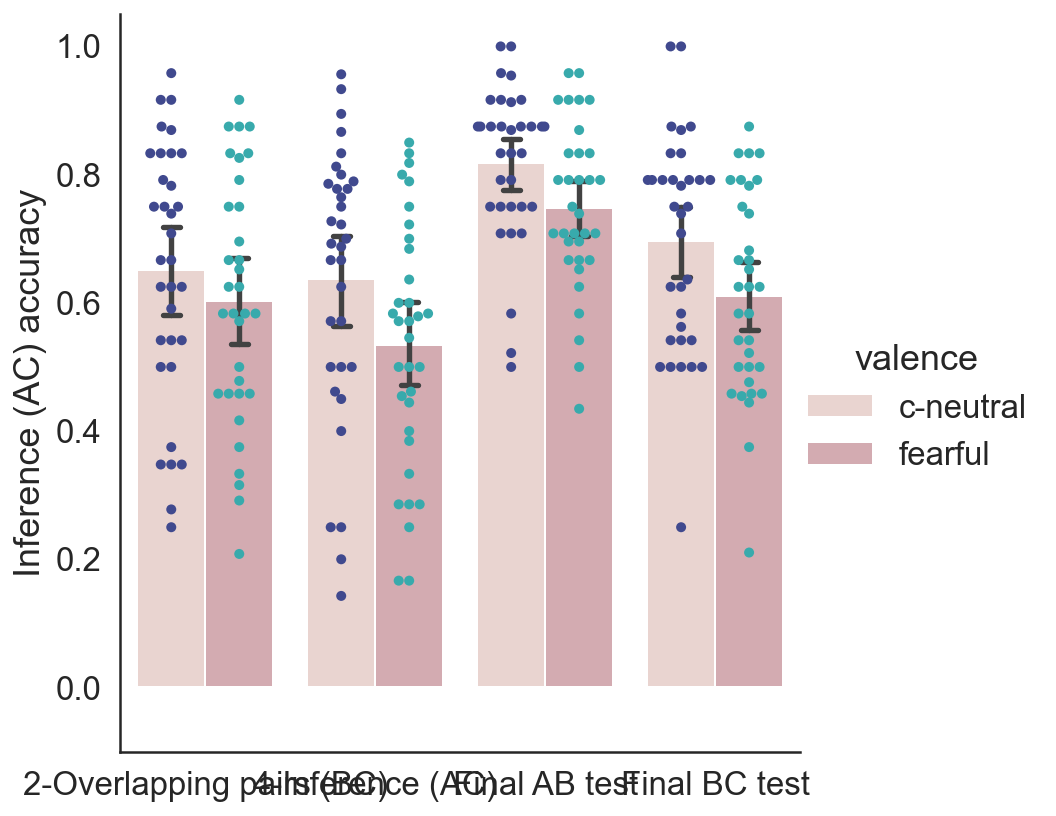

In [10]:
##################
#BAR GRAPHS
##################
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=exp1,
 height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=exp1, palette = "mako", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Inference (AC) accuracy")
plt.xlabel('')
plt.show()

In [11]:
neutral_means2

[0.6377938131774449, 0.6139718614718614, 0.6959125656151308]

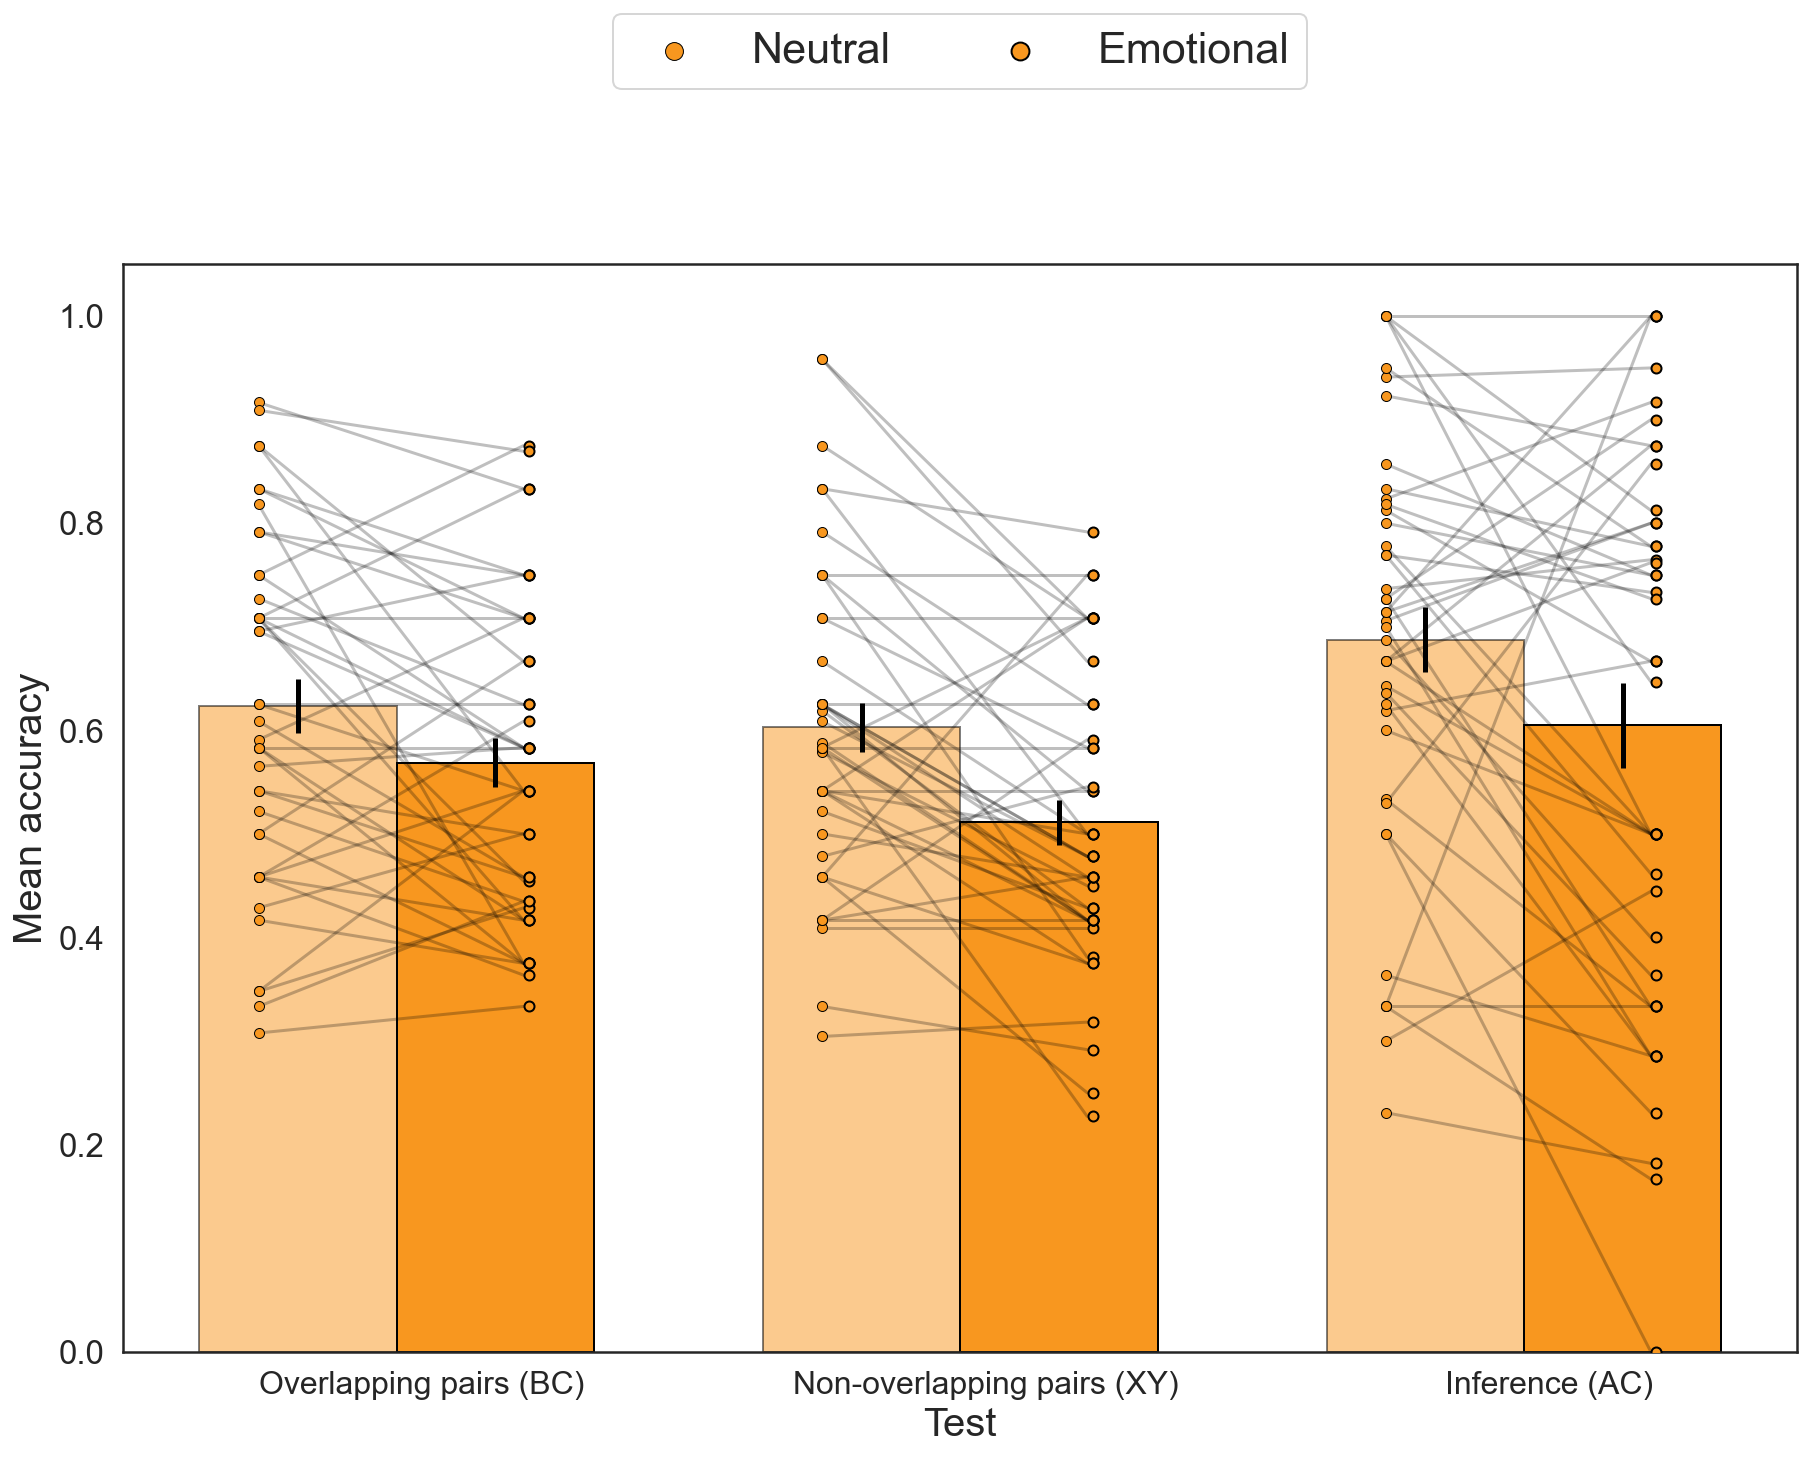

In [12]:
#UT branded colors 
red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral
white = '#ffffff'
black = '#333f48'
ut_red = '#bf5700' #emotional 
ut_blue = '#f8971f' #neutral
fig_blue= '#00a9b7' #neutral
fig_dblue= '#005f86' #emotional
fig, ax = plt.subplots(figsize=(15, 10))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(3) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means4, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 0.5,
    yerr=neutral_sems4,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, emotional_means4, width,
    color= ut_blue,
    #hatch = '.',
    edgecolor= "black",
    alpha = 1,
    yerr=emotional_sems4,
    error_kw=dict(elinewidth=2.5,ecolor='black'))

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2
for one_exp, subdf in mainexp4.groupby('Test'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "c-neutral"')['Total_acc'].values
    d = subdf.query('valence == "fearful"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.25]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=ut_blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=ut_blue, edgecolors= "black",
    s=25, lw=1, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)', 'Non-overlapping pairs (XY)', 'Inference (AC)']
ax.set_xticks([0.22, 1.22, 2.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Mean accuracy', fontsize =20)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0') 

Text(0, 0.5, 'Mean accuracy')

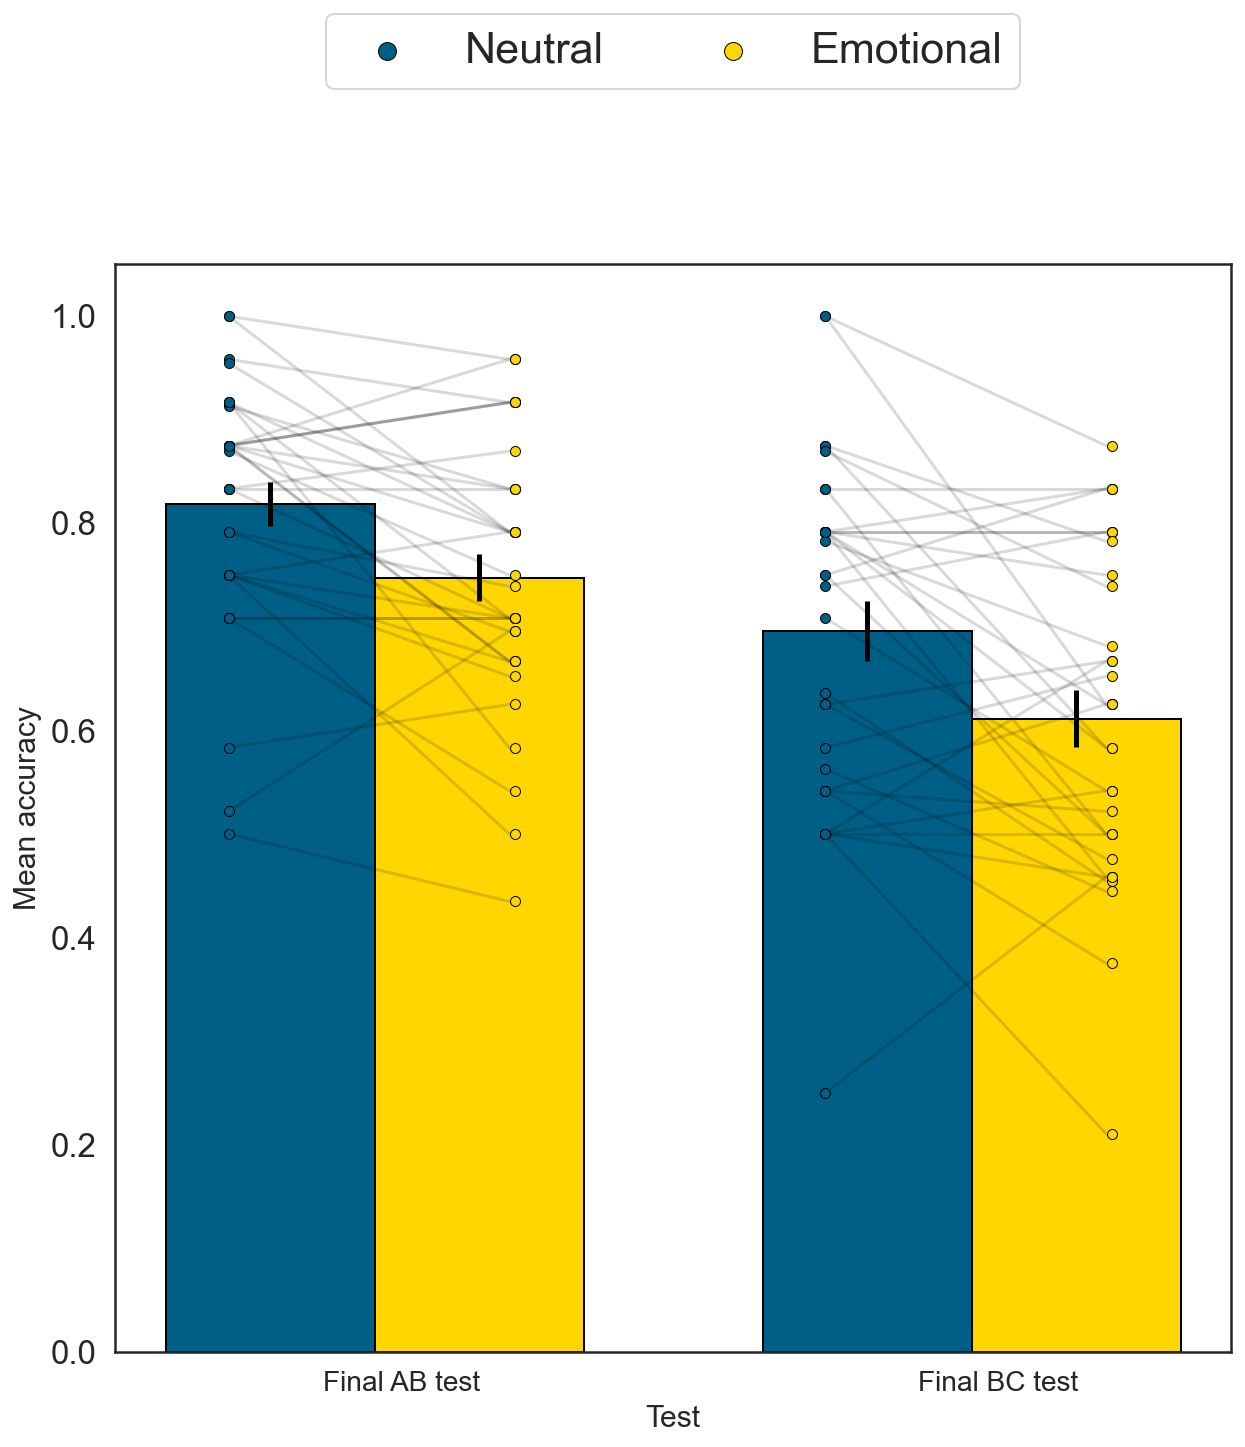

In [13]:
## Final tests
Finals = [FinalAB, FinalBC]
Finals = pd.concat(Finals)
FinalAB_neu = FinalAB.loc[FinalAB['valence'] == 'c-neutral']
FinalAB_emo = FinalAB.loc[FinalAB['valence'] == 'fearful']
FinalBC_neu = FinalBC[FinalBC['valence'] == 'c-neutral']
FinalBC_emo = FinalBC.loc[FinalBC['valence'] == 'fearful']

neuAB_finalmean = np.mean(FinalAB_neu['Total_acc'])
emoAB_finalmean = np.mean(FinalAB_emo['Total_acc'])
neuBC_finalmean = np.mean(FinalBC_neu['Total_acc'])
emoBC_finalmean = np.mean(FinalBC_emo['Total_acc'])

neuAB_finalstd = stats.sem(FinalAB_neu['Total_acc'])
emoAB_finalstd = stats.sem(FinalAB_emo['Total_acc'])
neuBC_finalstd = stats.sem(FinalBC_neu['Total_acc'])
emoBC_finalstd = stats.sem(FinalBC_emo['Total_acc'])

neutral_finalmeans = [neuAB_finalmean, neuBC_finalmean]
emotional_finalmeans = [emoAB_finalmean, emoBC_finalmean]
neutral_finalsems = [neuAB_finalstd, neuBC_finalstd]
emotional_finalsems = [emoAB_finalstd, emoBC_finalstd]

#UT branded colors 
red = '#ffd600' #yellow 
blue = '#005f86' #dark blue

fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####


##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_finalmeans, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_finalsems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, emotional_finalmeans, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_finalsems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2
for one_exp, subdf in Finals.groupby('Test'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "c-neutral"')['Total_acc'].values
    d = subdf.query('valence == "fearful"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels 
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(exps2, fontsize='14')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 15)
ax.set_ylabel('Mean accuracy', fontsize =15)

## AB3 Learning curve

In [14]:
ABstacked_exp1 = pd.melt(val_exp_4, id_vars=['participant'], value_vars=['Avg_AB1', 'Avg_AB2', 'Avg_AB3', 'Avg_AB1_emo', 'Avg_AB2_emo', 'Avg_AB3_emo' ], var_name='condition', value_name='Total_acc')
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1', 'Test'] = 'AB1'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2', 'Test'] = 'AB2'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3', 'Test'] = 'AB3'

ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1_emo', 'Test'] = 'AB1'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2_emo', 'Test'] = 'AB2'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3_emo', 'Test'] = 'AB3'

ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1', 'valence'] = 'c-neutral'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2', 'valence'] = 'c-neutral'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3', 'valence'] = 'c-neutral'

ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB1_emo', 'valence'] = 'fearful'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB2_emo', 'valence'] = 'fearful'
ABstacked_exp1.loc[ABstacked_exp1['condition'] == 'Avg_AB3_emo', 'valence'] = 'fearful'

AB1 = ABstacked_exp1.loc[ABstacked_exp1['Test'] == 'AB1']
AB2 = ABstacked_exp1.loc[ABstacked_exp1['Test'] == 'AB2']
AB3 = ABstacked_exp1.loc[ABstacked_exp1['Test'] == 'AB3']

neuAB1 = AB1.loc[AB1['valence'] == 'c-neutral']
neuAB2 = AB2.loc[AB2['valence'] == 'c-neutral']
neuAB3 = AB3.loc[AB3['valence'] == 'c-neutral']

emoAB1 = AB1.loc[AB1['valence'] == 'fearful']
emoAB2 = AB2.loc[AB2['valence'] == 'fearful']
emoAB3 = AB3.loc[AB3['valence'] == 'fearful']

neuAB1_mean = np.mean(neuAB1['Total_acc'])
neuAB1_std = stats.sem(neuAB1['Total_acc'])
emoAB1_mean = np.mean(emoAB1['Total_acc'])
emoAB1_std = stats.sem(emoAB1['Total_acc'])

neuAB2_mean = np.mean(neuAB2['Total_acc'])
neuAB2_std = stats.sem(neuAB2['Total_acc'])
emoAB2_mean = np.mean(emoAB2['Total_acc'])
emoAB2_std = stats.sem(emoAB2['Total_acc'])

neuAB3_mean = np.mean(neuAB3['Total_acc'])
neuAB3_std = stats.sem(neuAB3['Total_acc'])
emoAB3_mean = np.mean(emoAB3['Total_acc'])
emoAB3_std = stats.sem(emoAB3['Total_acc'])

neutralAB_means = [neuAB1_mean, neuAB2_mean, neuAB3_mean]
neutralAB_sems = [neuAB1_std, neuAB2_std, neuAB3_std]
emotionalAB_means = [emoAB1_mean, emoAB2_mean, emoAB3_mean]
emotionalAB_sems = [emoAB1_std, emoAB2_std, emoAB3_std]


Text(0, 0.5, 'Mean accuracy')

findfont: Font family ['Benton Sans Light'] not found. Falling back to DejaVu Sans.


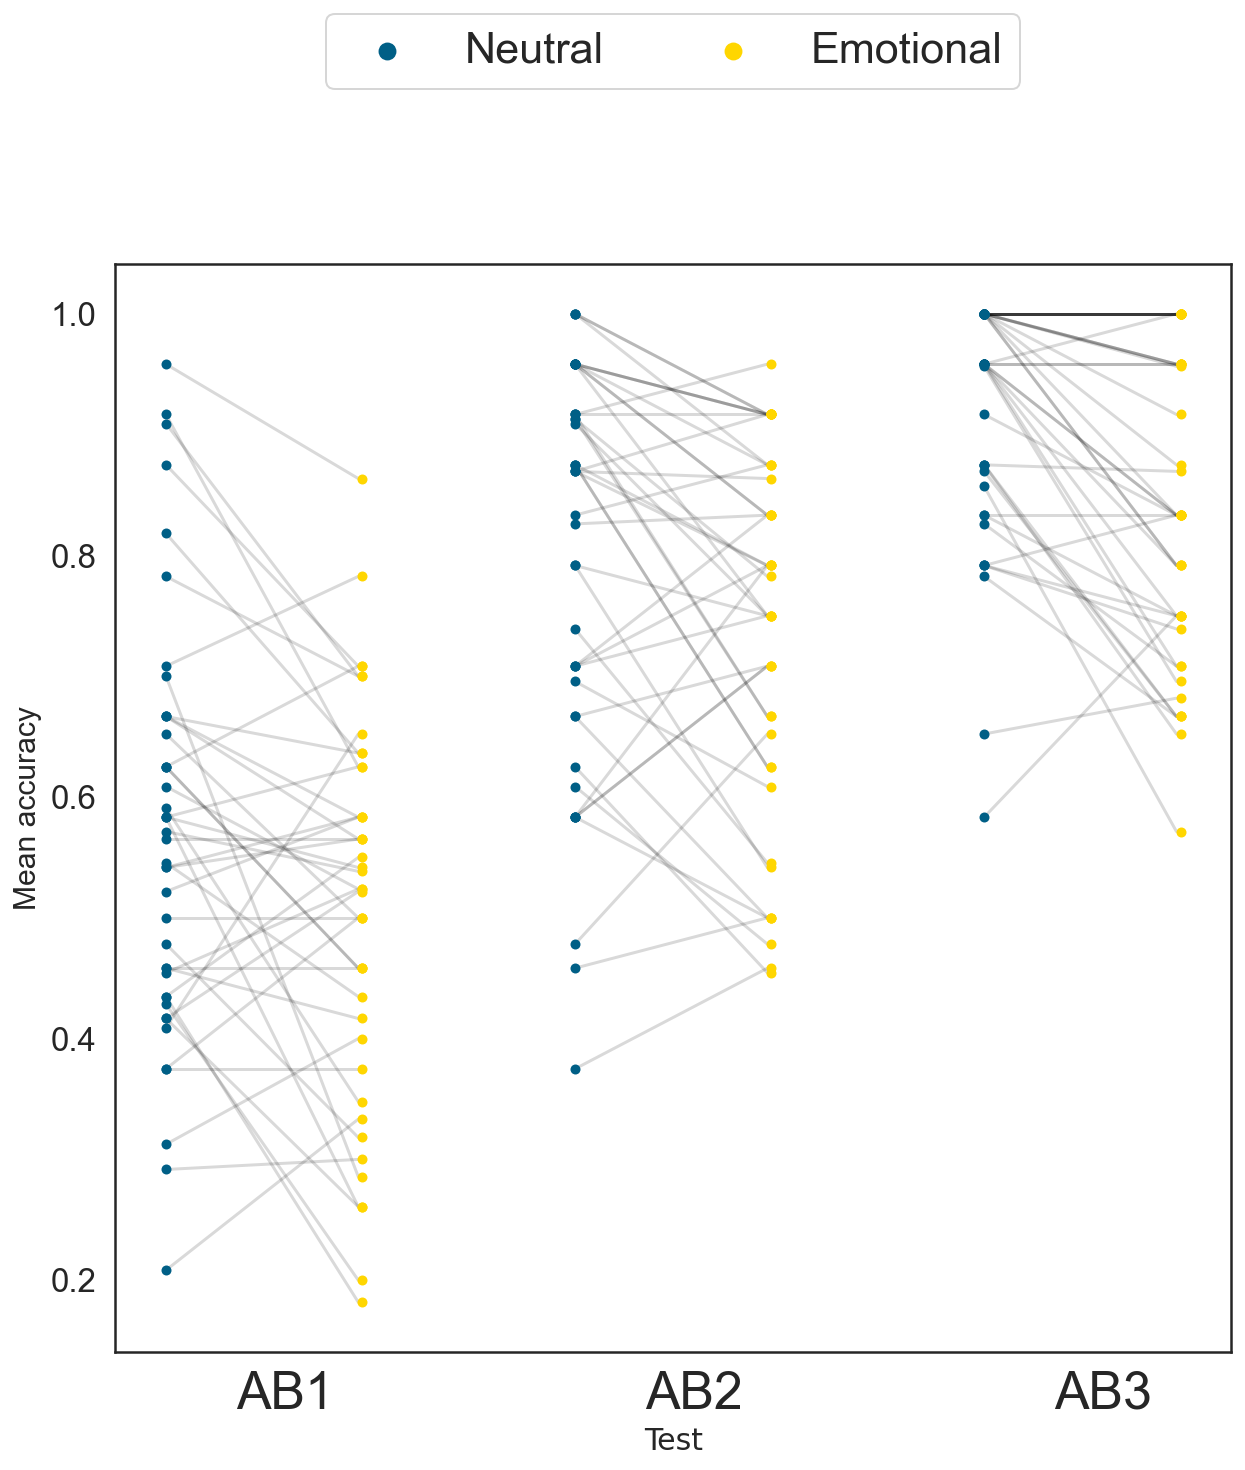

In [15]:
#UT branded colors and font 
red = '#ffd600' #yellow 
blue = '#005f86' #dark blue
#utfont = {'fontfamily' :'Benton Sans Light'}
fig, ax = plt.subplots(figsize=(10, 10))


exps = []
i =0.2
for one_exp, subdf in ABstacked_exp1.groupby('Test'):
    exps.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "c-neutral"')['Total_acc'].values
    d = subdf.query('valence == "fearful"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0, label='Emotional', zorder=10)
 # Update x-axis
    i += 1

ax.set_xticks([0.22, 1.22, 2.22])
_ = ax.set_xticklabels(exps, fontsize='x-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 15, fontfamily = "Benton Sans Light")
ax.set_ylabel('Mean accuracy', fontsize =15)

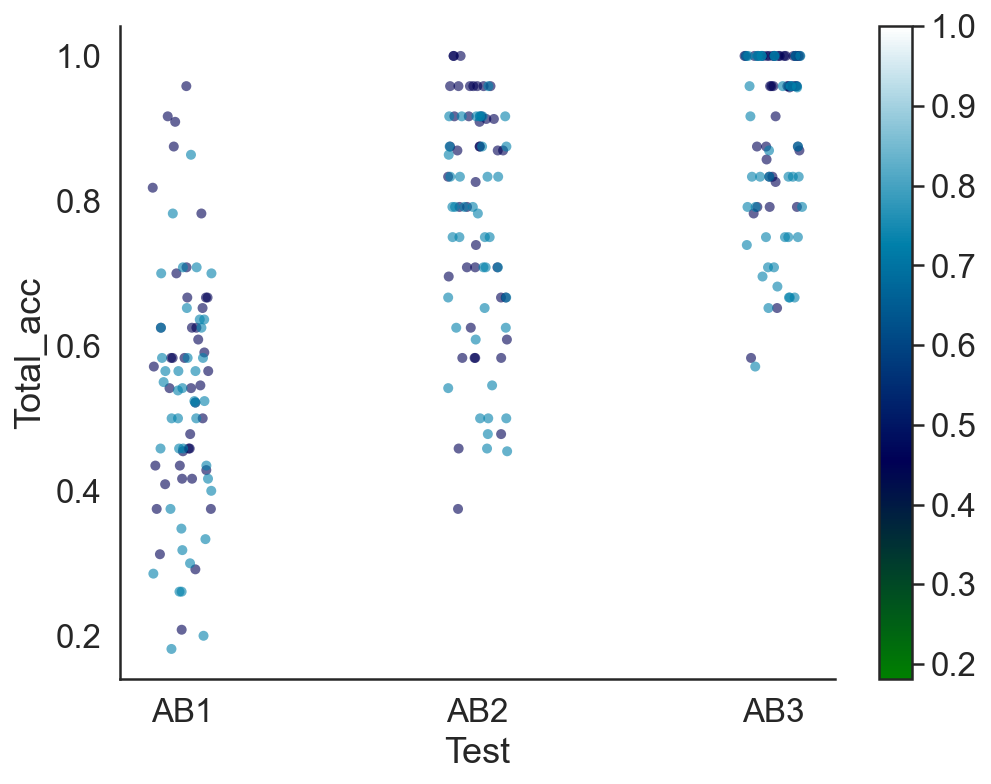

In [16]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plot = sns.stripplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp1, 
              palette='ocean', 
              jitter=True, edgecolor='none', alpha=.60)
plot.get_legend().set_visible(False)
sns.despine()
ABstacked_exp1.describe()

# Drawing the side color bar
normalize = mcolors.Normalize(vmin=ABstacked_exp1["Total_acc"].min(), vmax=ABstacked_exp1["Total_acc"].max())
colormap = cm.ocean

for n in ABstacked_exp1['Total_acc']:
    plt.plot(color=colormap(normalize(n)))

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(ABstacked_exp1['Total_acc'])
plt.colorbar(scalarmappaple)

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


,Total_acc
count,252.000000
mean,0.730206
std,0.208437
min,0.181818
25%,0.583333
50%,0.750000
75%,0.916667
max,1.000000


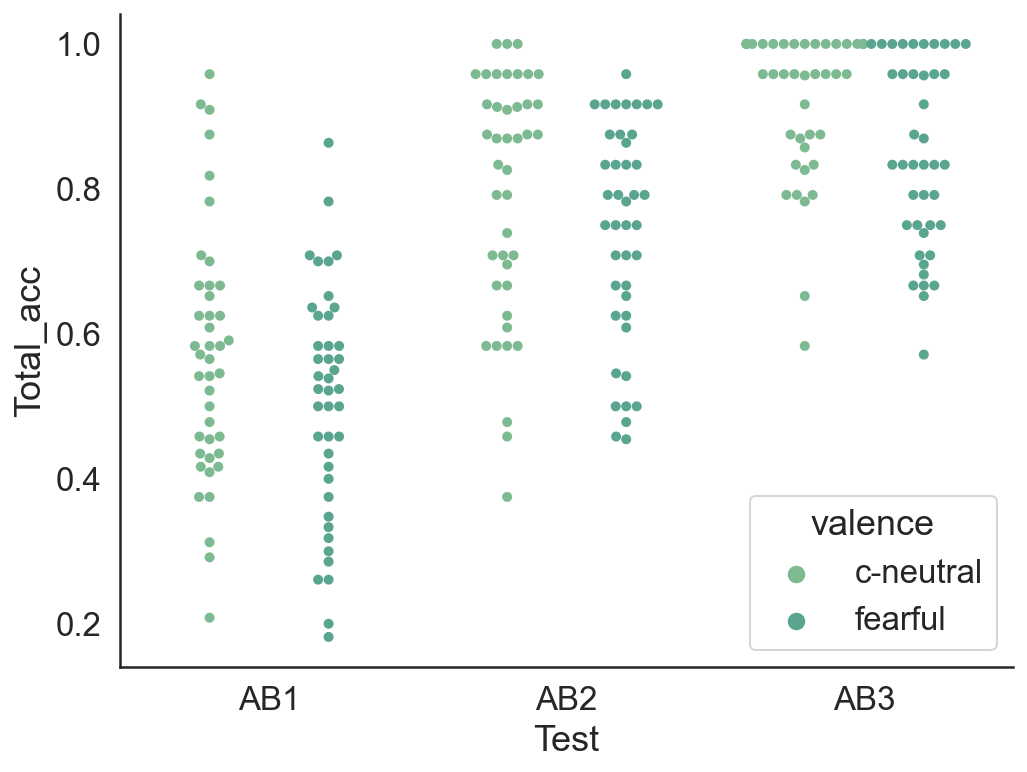

In [17]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp1, palette = sns.color_palette("crest"), dodge=True)
plot.get_legend().set_visible(False)
sns.despine()
ABstacked_exp1.describe()

## scatter plot


C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


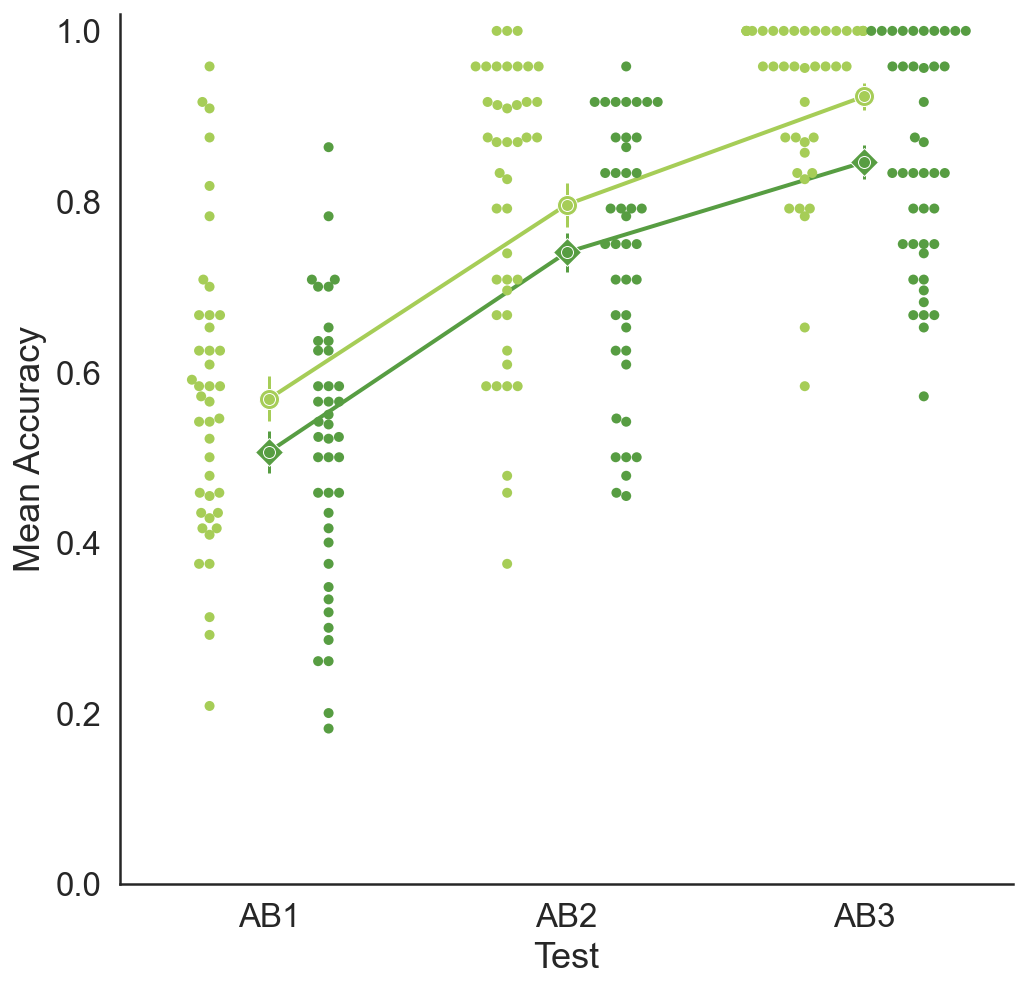

In [18]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

red = '#c51b8a' #yellow 
blue = '#fa9fb5' #neutral

lightg= '#a6cd57'#'#a1d99b'
darkg= '#579d42'#'#31a354'

colors = [lightg, darkg]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(8, 8))

g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=ABstacked_exp1, palette = customPalette, dodge=True)
#plot.get_legend().set_visible(False)
g.legend_.remove()
sns.despine()
ABstacked_exp1.describe()
utneu = '#f8971f'
utemo = '#bf5700'
Tests = ['AB1', 'AB2', 'AB3']
ABmeans_df = pd.DataFrame({
    'Tests': Tests, 
    'Neutral Means': neutralAB_means,
    'Emotional Means': emotionalAB_means})
plt.plot('Tests', 'Neutral Means', data=ABmeans_df, linestyle='-', linewidth = 2,  marker='o', markersize = 10, color = lightg)
plt.errorbar(Tests, neutralAB_means, yerr=neutralAB_sems, fmt="o", color = lightg)
plt.plot('Tests', 'Emotional Means', data=ABmeans_df, linestyle='-', linewidth = 2, marker='D', markersize = 10, color = darkg)
plt.errorbar(Tests, emotionalAB_means, yerr=emotionalAB_sems, fmt="o", color = darkg)
plt.ylim (0,1.02)
plt.ylabel('Mean Accuracy')
plt.show()
 

Text(0, 0.5, 'Mean accuracy')

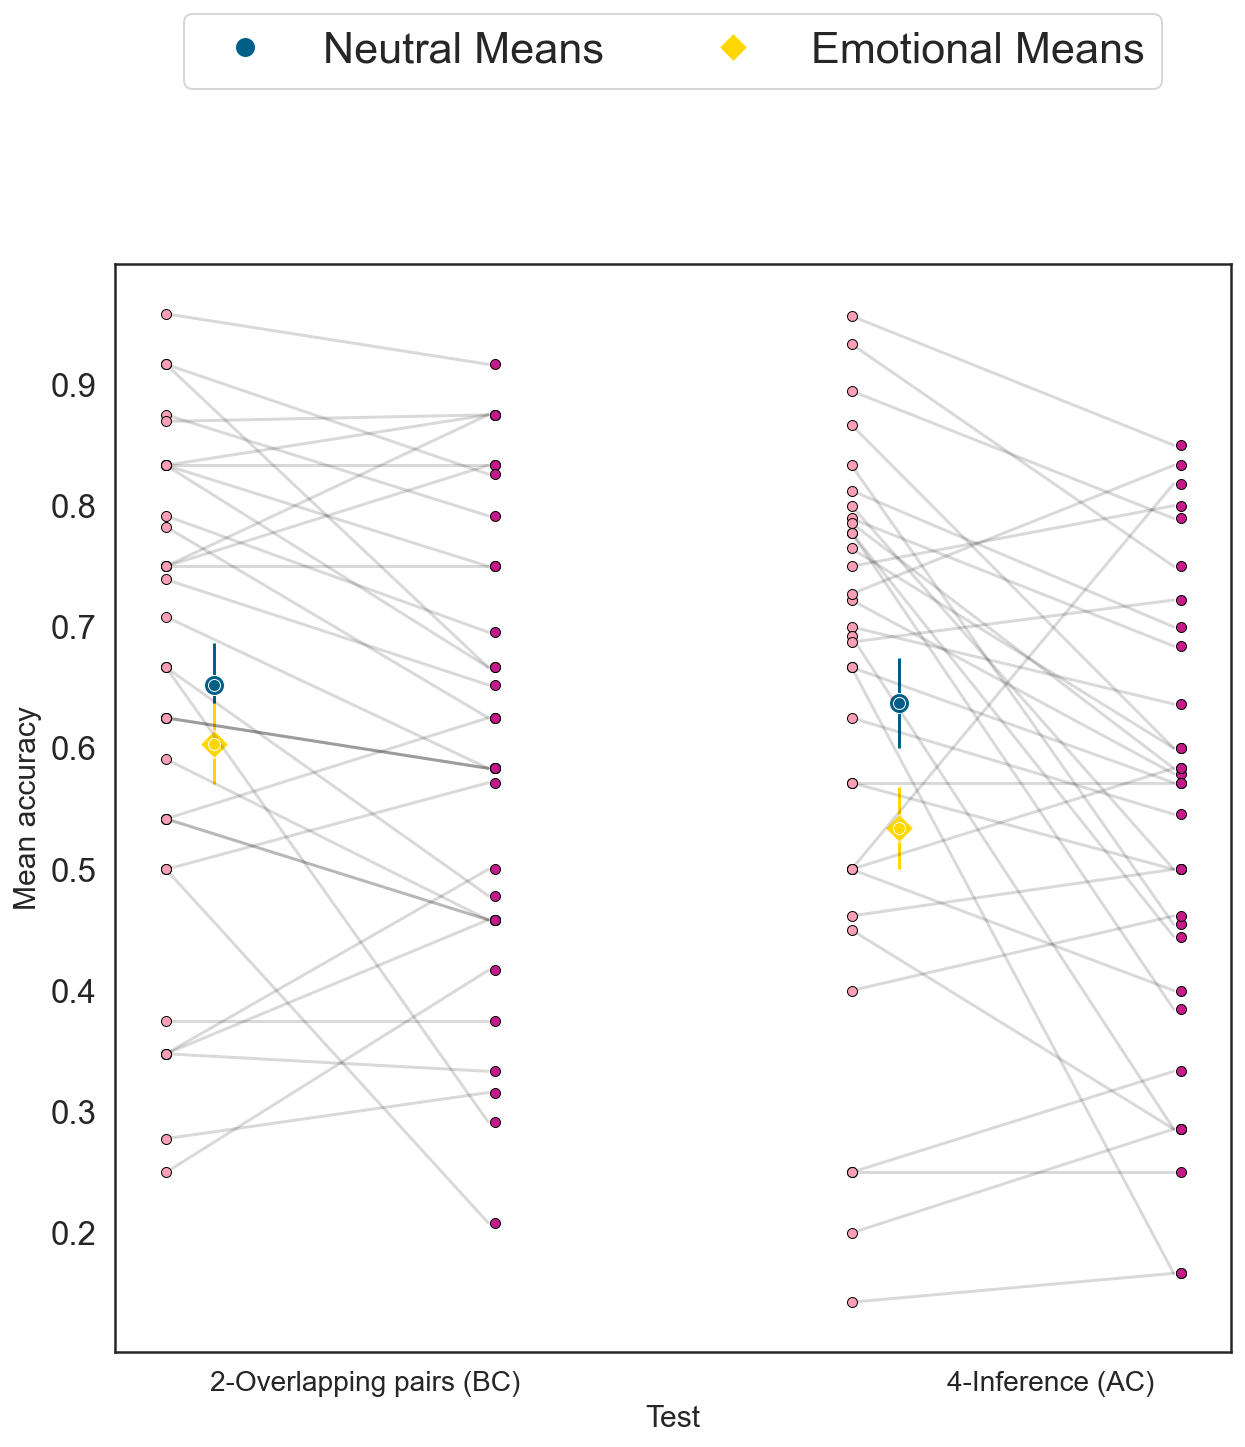

In [19]:
#UT branded colors 
utemo = '#ffd600' #yellow 
utneu = '#005f86' #dark blue


fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####
Tests = ['BC', 'AC']
mainmeans_df = pd.DataFrame({
    'Test': Tests, 
    'Neutral Means': neutral_means1,
    'Emotional Means': emotional_means1})

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
plt.plot('Test', 'Neutral Means', data=mainmeans_df, linestyle='None',  marker='o', markersize = 10, color = utneu)
plt.errorbar(Tests, neutral_means1, yerr=neutral_sems1, fmt="o", color = utneu)
plt.plot('Test', 'Emotional Means', data=mainmeans_df, linestyle='None', marker='D', markersize = 10, color = utemo)
plt.errorbar(Tests, emotional_means1, yerr=emotional_sems1, fmt="o", color = utemo)

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2
for one_exp, subdf in mainexp1.groupby('Test'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('valence == "c-neutral"')['Total_acc'].values
    d = subdf.query('valence == "fearful"')['Total_acc'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels 
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(exps2, fontsize='14')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 15)
ax.set_ylabel('Mean accuracy', fontsize =15)

Text(0, 0.5, 'Mean accuracy')

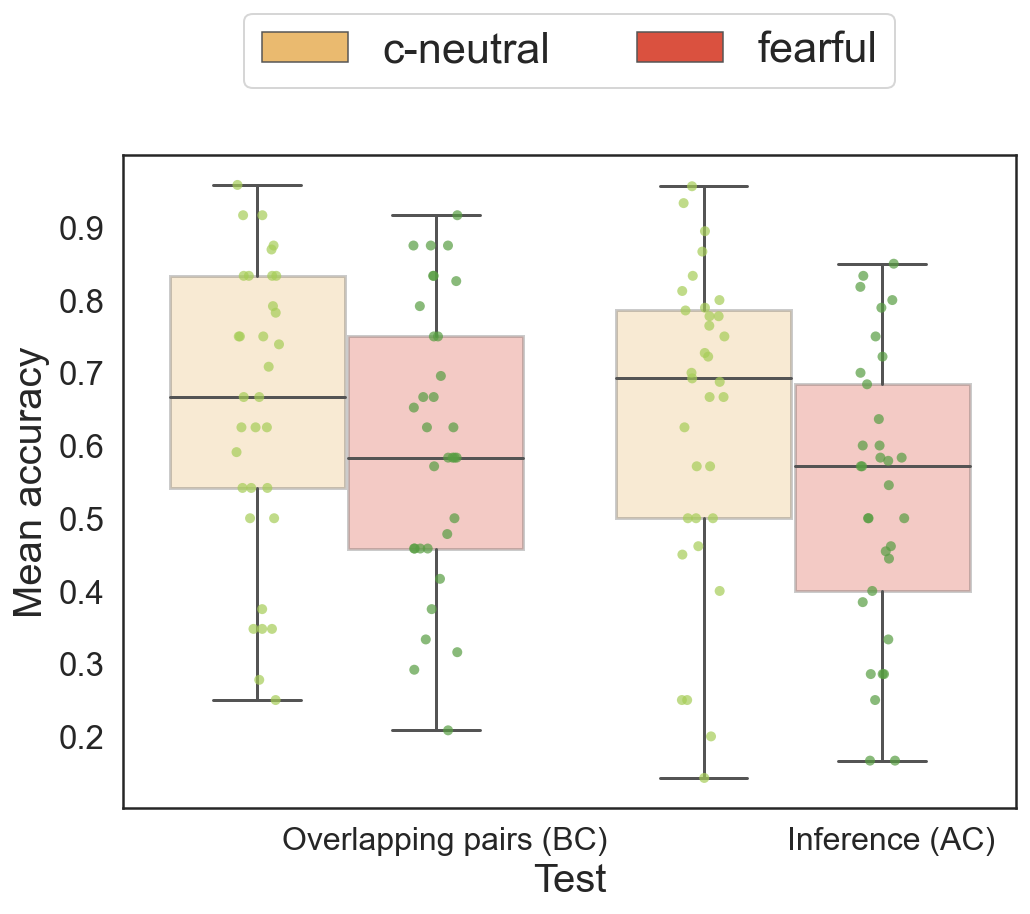

In [20]:
#UT branded colors 
red = '#ffd600' #yellow 
blue = '#005f86' #dark blue


#fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####
Tests = ['BC', 'AC']
mainmeans_df = pd.DataFrame({
    'Test': Tests, 
    'Neutral Means': neutral_means1,
    'Emotional Means': emotional_means1})

mainmeans_stack = pd.melt(mainmeans_df, id_vars=['Test'], value_vars=['Neutral Means', 'Emotional Means'], var_name='type', value_name='grp_mean')

mainmeans_stack.loc[mainmeans_stack['type'] == 'Neutral Means', 'valence'] = 'c-Neutral'
mainmeans_stack.loc[mainmeans_stack['type'] == 'Emotional Means', 'valence'] = 'Emotional'

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars

x = mainmeans_stack.Test

BC = pd.DataFrame({
    'Neutral Means': neuBC_mean1,
    'Emotional Means': emoBC_mean1}, index=x)

AC = pd.DataFrame({
    'Neutral Means': neuAC_mean1,
    'Emotional Means': emoAC_mean1}, index=x)

fig, ax = plt.subplots()

# #ax = plt.plot('Test', 'Neutral Means', data=mainmeans_df, linestyle='None',  marker='o', markersize = 10, color = utneu)
# ax.plot('Test', 'Neutral Means', data=mainmeans_df, linestyle='None',  marker='o', markersize = 10, color = utneu)
# ax.errorbar('Test', 'Neutral Means', data=mainmeans_df, yerr=neutral_sems1, fmt="o", color = utneu)
# ax.plot('Test', 'Emotional Means', data=mainmeans_df, linestyle='None', marker='D', markersize = 10, color = utemo)
# ax.errorbar('Test', 'Emotional Means', data=mainmeans_df, yerr=emotional_sems1, fmt="o", color = utemo)

# ax.set_xticks([0.22, 1.22, 2.22, 3.22])


# pal2 = sns.color_palette(['red','dodgerblue'],desat=.8)
# pal26 = [pal2[0],pal2[0],pal2[1],pal2[1]]

# BC.plot(ax=ax, color=sns.color_palette('Blues_d', 2))
# AC.plot(ax=ax, color=sns.color_palette('BuGn_d', 2))

#ax.legend(ncol=2, loc='best')

bp = sns.boxplot(y='Total_acc', x='Test', 
                 data=mainexp1, 
                 palette= "YlOrRd",
                 hue='valence',
                 boxprops=dict(alpha=.3))

sns.stripplot(y='Total_acc', x='Test', 
                   data=mainexp1, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   alpha=0.7,
                   hue='valence')
ax.legend_.remove()
# Fix the axes and labels 
lbls = ['Overlapping pairs (BC)','Inference (AC)']
ax.set_xticks([0.22, 1.22])
_ = ax.set_xticklabels(lbls, fontsize='16')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test', fontsize = 20)
ax.set_ylabel('Mean accuracy', fontsize =20)





In [21]:
#plt.plot([0,1,2,3],mainmeans_df.melt().values[2:])
emotional_means1

[0.6034664229393941, 0.534444370030303]

In [22]:
BCexp1_emo

,participant,condition,Total_acc,ExpNum,valence,Test
33,A0017268R9SKD8U2Y3F,Avg_BC_emo,0.875000,1,fearful,2-Overlapping pairs (BC)
34,A12HWPFXQPITHD,Avg_BC_emo,0.478261,1,fearful,2-Overlapping pairs (BC)
35,A14WLAP6TCEKO0,Avg_BC_emo,0.315789,1,fearful,2-Overlapping pairs (BC)
36,A16G6PPH1INQL8,Avg_BC_emo,0.625000,1,fearful,2-Overlapping pairs (BC)
37,A1C5SQZ045W0L5,Avg_BC_emo,0.625000,1,fearful,2-Overlapping pairs (BC)
38,A1IFIK8J49WBER,Avg_BC_emo,0.833333,1,fearful,2-Overlapping pairs (BC)
39,A2AZYU1CT24O0K,Avg_BC_emo,0.833333,1,fearful,2-Overlapping pairs (BC)
40,A2F1AA15HG0FRU,Avg_BC_emo,0.291667,1,fearful,2-Overlapping pairs (BC)
41,A2RVFMCKSSEHDV,Avg_BC_emo,0.375000,1,fearful,2-Overlapping pairs (BC)
42,A2UOSEPGNUITM8,Avg_BC_emo,0.826087,1,fearful,2-Overlapping pairs (BC)


In [23]:
mainmeans_df

,Test,Neutral Means,Emotional Means
0,BC,0.651873,0.603466
1,AC,0.637195,0.534444


In [24]:
mainmeans_stack

,Test,type,grp_mean,valence
0,BC,Neutral Means,0.651873,c-Neutral
1,AC,Neutral Means,0.637195,c-Neutral
2,BC,Emotional Means,0.603466,Emotional
3,AC,Emotional Means,0.534444,Emotional


## STOP!!!

Text(0, 0.5, 'Mean Reaction Time (s) (Src-cntrlld for AB3 and BC)')

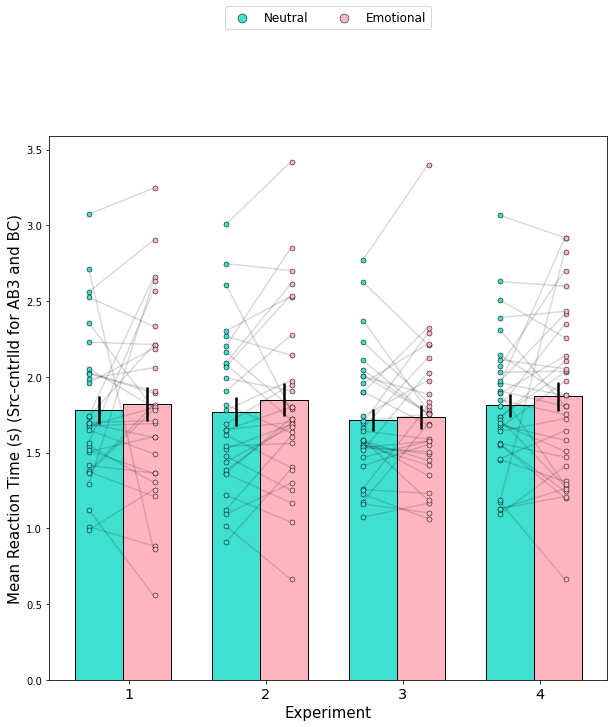

In [18]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

rt_exp1 = rt_experiments.loc[rt_experiments['ExpNum'] == '1']
rt_exp2 = rt_experiments.loc[rt_experiments['ExpNum'] == '2']
rt_exp3 = rt_experiments.loc[rt_experiments['ExpNum'] == '3']
rt_exp4 = rt_experiments.loc[rt_experiments['ExpNum'] == '4']

rt_exp1_neu = rt_exp1.loc[rt_exp1['condition'] == 'Avg_AC']
rt_exp2_neu = rt_exp2.loc[rt_exp2['condition'] == 'Avg_AC']
rt_exp3_neu = rt_exp3.loc[rt_exp3['condition'] == 'Avg_AC']
rt_exp4_neu = rt_exp4.loc[rt_exp4['condition'] == 'Avg_AC']

rt_exp1_emo = rt_exp1.loc[rt_exp1['condition'] == 'Avg_AC_emo']
rt_exp2_emo = rt_exp2.loc[rt_exp2['condition'] == 'Avg_AC_emo']
rt_exp3_emo = rt_exp3.loc[rt_exp3['condition'] == 'Avg_AC_emo']
rt_exp4_emo = rt_exp4.loc[rt_exp4['condition'] == 'Avg_AC_emo']

rt_neuAC_mean1 = np.mean(rt_exp1_neu['RT'])
rt_emoAC_mean1 = np.mean(rt_exp1_emo['RT'])
rt_neuAC_mean2 = np.mean(rt_exp2_neu['RT'])
rt_emoAC_mean2 = np.mean(rt_exp2_emo['RT'])
rt_neuAC_mean3 = np.mean(rt_exp3_neu['RT'])
rt_emoAC_mean3 = np.mean(rt_exp3_emo['RT'])
rt_neuAC_mean4 = np.mean(rt_exp4_neu['RT'])
rt_emoAC_mean4 = np.mean(rt_exp4_emo['RT'])

rt_neuAC_std1 = stats.sem(rt_exp1_neu['RT'])
rt_emoAC_std1 = stats.sem(rt_exp1_emo['RT'])
rt_neuAC_std2 = stats.sem(rt_exp2_neu['RT'])
rt_emoAC_std2 = stats.sem(rt_exp2_emo['RT'])
rt_neuAC_std3 = stats.sem(rt_exp3_neu['RT'])
rt_emoAC_std3 = stats.sem(rt_exp3_emo['RT'])
rt_neuAC_std4 = stats.sem(rt_exp4_neu['RT'])
rt_emoAC_std4 = stats.sem(rt_exp4_emo['RT'])

neutral_means = [rt_neuAC_mean1, rt_neuAC_mean2, rt_neuAC_mean3, rt_neuAC_mean4]
neutral_sems = [rt_neuAC_std1, rt_neuAC_std2, rt_neuAC_std3, rt_neuAC_std4]
emotional_means = [rt_emoAC_mean1, rt_emoAC_mean2, rt_emoAC_mean3, rt_emoAC_mean4]
emotional_sems = [rt_emoAC_std1, rt_emoAC_std2, rt_emoAC_std3, rt_emoAC_std4]

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(4) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, neutral_means, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, emotional_means, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
##################
#SCATTERPLOT GRAPHS
##################
rt_exps = []
#i = 1.0
i = 0.2
for one_exp, subdf in rt_experiments.groupby('ExpNum'):
    rt_exps.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('condition == "Avg_AC"')['RT'].values
    d = subdf.query('condition == "Avg_AC_emo"')['RT'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
     # Set up line color (based on greater than value)
     #line_colors = (h - d) > 0
     #line_colors = [blue if j else red for j in line_colors]
     #line_colors = [red if j else blue for j in line_colors]
     # Also set up alpha values to make the lines slightly transparent
     #alphas = [0.4]*len(line_colors)
     # Plot the lines connecting the dots
     #for hi, di, ci, ai in zip(h, d, line_colors, alphas):
     # ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels
    
ax.set_xticks([0.22, 1.22, 2.22, 3.22])
_ = ax.set_xticklabels(rt_exps, fontsize='x-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Experiment', fontsize = 15)
ax.set_ylabel('Mean Reaction Time (s) (Src-cntrlld for AB3 and BC)', fontsize =15)

## VALENCE EFFECTS IN PHASES FOR ALL EXPERIMENTS

In [3]:
exp_4

,participant,Avg_AB1,Avg_AB2,Avg_AB3,Avg_BC,Avg_XY,Avg_AC,Avg_AB1_emo,Avg_AB2_emo,Avg_AB3_emo,Avg_BC_emo,Avg_XY_emo,Avg_AC_emo
0,A13B52O6OQBPO,0.583333,0.826087,1.000000,0.750000,0.708333,0.791667,0.541667,0.833333,0.875000,0.583333,0.583333,0.625000
1,A18E16UFE351U6,0.652174,0.869565,0.958333,0.833333,0.833333,0.708333,0.500000,0.791667,1.000000,0.708333,0.500000,0.750000
2,A1DCG37N0Y8BN0,0.916667,0.916667,1.000000,0.916667,0.875000,0.958333,0.625000,0.666667,0.791667,0.833333,0.708333,0.666667
3,A1JJYY622DGE5L,0.958333,1.000000,1.000000,0.791667,0.958333,0.958333,0.863636,0.916667,1.000000,0.750000,0.708333,0.958333
4,A1MF5X99676P61A1MF5X99676P61,0.818182,0.916667,1.000000,0.727273,0.619048,0.625000,0.636364,0.916667,1.000000,0.625000,0.428571,0.333333
5,A1P6OXEJ86HQRM,0.625000,0.958333,1.000000,0.625000,0.458333,0.500000,0.708333,0.833333,0.958333,0.625000,0.750000,0.416667
6,A1PTH9KTRO06EG,0.500000,0.791667,0.869565,0.875000,0.416667,0.750000,0.500000,0.541667,0.666667,0.666667,0.416667,0.458333
7,A1TPGXT718D68E,0.590909,0.875000,0.875000,0.695652,0.521739,0.583333,0.347826,0.625000,0.869565,0.583333,0.428571,0.666667
8,A1Z1O6MMOB3UWW,0.458333,0.875000,0.958333,0.708333,0.625000,0.750000,0.458333,0.791667,0.833333,0.708333,0.416667,0.583333
9,A1ZI4VU6650Q8B,0.666667,0.958333,1.000000,0.750000,0.958333,0.708333,0.583333,0.916667,1.000000,0.875000,0.666667,0.708333


In [4]:
stacked_exp1 = pd.melt(exp_1, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_AC', 'Avg_AC_emo', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='Total_acc')
stacked_exp2 = pd.melt(exp_2, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp3 = pd.melt(exp_3, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')
stacked_exp4 = pd.melt(exp_4, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='Total_acc')

stacked_exp1 ['ExpNum'] = '1'
stacked_exp2 ['ExpNum'] = '2'
stacked_exp3 ['ExpNum'] = '3'
stacked_exp4 ['ExpNum'] = '4'

mrg_experiments= [stacked_exp1, stacked_exp2, stacked_exp3, stacked_exp4]
experiments = pd.concat(mrg_experiments)
experiments

rt_stacked_exp1 = pd.melt(rt_exp_1, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_AC', 'Avg_AC_emo', 'Avg_ABfinal', 'Avg_ABfinal_emo', 'Avg_BCfinal', 'Avg_BCfinal_emo'], var_name='condition', value_name='RT')
rt_stacked_exp2 = pd.melt(rt_exp_2, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp3 = pd.melt(rt_exp_3, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')
rt_stacked_exp4 = pd.melt(rt_exp_4, id_vars=['participant'], value_vars=['Avg_AB3', 'Avg_AB3_emo', 'Avg_BC', 'Avg_BC_emo', 'Avg_XY', 'Avg_XY_emo', 'Avg_AC', 'Avg_AC_emo'], var_name='condition', value_name='RT')

rt_stacked_exp1 ['ExpNum'] = '1'
rt_stacked_exp2 ['ExpNum'] = '2'
rt_stacked_exp3 ['ExpNum'] = '3'
rt_stacked_exp4 ['ExpNum'] = '4'
rt_mrg_experiments= [rt_stacked_exp1, rt_stacked_exp2, rt_stacked_exp3, rt_stacked_exp4]
rt_experiments = pd.concat(rt_mrg_experiments)
rt_experiments

,participant,condition,RT,ExpNum
0,A0017268R9SKD8U2Y3F,Avg_AB3,0.638793,1
1,A12HWPFXQPITHD,Avg_AB3,1.073051,1
2,A16G6PPH1INQL8,Avg_AB3,1.018429,1
3,A1C5SQZ045W0L5,Avg_AB3,1.035213,1
4,A1IFIK8J49WBER,Avg_AB3,0.946272,1
...,...,...,...,...
267,A106MX66IVHW6T,Avg_AC_emo,2.601909,4
268,A2V8CV9H3U2M5P,Avg_AC_emo,1.245136,4
269,A4158R4Y06ZB4,Avg_AC_emo,2.191235,4
270,ATOV0H5KQHI29,Avg_AC_emo,1.774054,4


C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


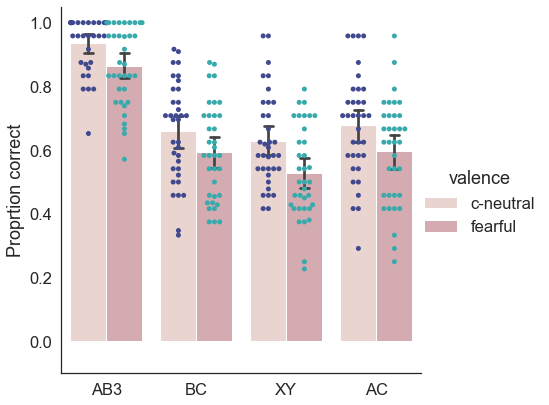

In [5]:
red = '#FFB6C1' #muted green (xkcd)
blue = '#40E0D0' #iris (xkcd)

#fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####

experiments.loc[experiments['condition'] == 'Avg_AB3', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_XY', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_AC', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'valence'] = 'c-neutral'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'valence'] = 'c-neutral'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'valence'] = 'fearful'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'valence'] = 'fearful'


experiments.loc[experiments['condition'] == 'Avg_AB3', 'Test'] = 'AB3'
experiments.loc[experiments['condition'] == 'Avg_BC', 'Test'] = 'BC'
experiments.loc[experiments['condition'] == 'Avg_XY', 'Test'] = 'XY'
experiments.loc[experiments['condition'] == 'Avg_AC', 'Test'] = 'AC'
experiments.loc[experiments['condition'] == 'Avg_ABfinal', 'Test'] = 'ABfinal'
experiments.loc[experiments['condition'] == 'Avg_BCfinal', 'Test'] = 'BCfinal'

experiments.loc[experiments['condition'] == 'Avg_AB3_emo', 'Test'] = 'AB3'
experiments.loc[experiments['condition'] == 'Avg_BC_emo', 'Test'] = 'BC'
experiments.loc[experiments['condition'] == 'Avg_XY_emo', 'Test'] = 'XY'
experiments.loc[experiments['condition'] == 'Avg_AC_emo', 'Test'] = 'AC'
experiments.loc[experiments['condition'] == 'Avg_ABfinal_emo', 'Test'] = 'ABfinal'
experiments.loc[experiments['condition'] == 'Avg_BCfinal_emo', 'Test'] = 'BCfinal'

exp1 = experiments.loc[experiments['ExpNum'] == '1']
exp2 = experiments.loc[experiments['ExpNum'] == '2']
exp3 = experiments.loc[experiments['ExpNum'] == '3']
exp4 = experiments.loc[experiments['ExpNum'] == '4']

AB3 = experiments.loc[experiments['Test'] == 'AB3']
BC = experiments.loc[experiments['Test'] == 'BC']
XY = experiments.loc[experiments['Test'] == 'XY']
AC = experiments.loc[experiments['Test'] == 'AC']

# neuAC_mean1 = np.mean(exp1_neu['Total_acc'])
# emoAC_mean1 = np.mean(exp1_emo['Total_acc'])
# neuAC_mean2 = np.mean(exp2_neu['Total_acc'])
# emoAC_mean2 = np.mean(exp2_emo['Total_acc'])
# neuAC_mean3 = np.mean(exp3_neu['Total_acc'])
# emoAC_mean3 = np.mean(exp3_emo['Total_acc'])
# neuAC_mean4 = np.mean(exp4_neu['Total_acc'])
# emoAC_mean4 = np.mean(exp4_emo['Total_acc'])

# neuAC_std1 = np.std(exp1_neu['Total_acc'])
# emoAC_std1 = np.std(exp1_emo['Total_acc'])
# neuAC_std2 = np.std(exp2_neu['Total_acc'])
# emoAC_std2 = np.std(exp2_emo['Total_acc'])
# neuAC_std3 = np.std(exp3_neu['Total_acc'])
# emoAC_std3 = np.std(exp3_emo['Total_acc'])
# neuAC_std4 = np.std(exp4_neu['Total_acc'])
# emoAC_std4 = np.std(exp4_emo['Total_acc'])

# neutral_means = [neuAC_mean1, neuAC_mean2, neuAC_mean3, neuAC_mean4]
# neutral_sems = [neuAC_std1, neuAC_std2, neuAC_std3, neuAC_std4]
# emotional_means = [emoAC_mean1, emoAC_mean2, emoAC_mean3, emoAC_mean4]
# emotional_sems = [emoAC_std1, emoAC_std2, emoAC_std3, emoAC_std4]

##################
#BAR GRAPHS
##################
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=exp4,
 height=6, kind="bar", palette=sns.cubehelix_palette(), capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=exp4, palette = "mako", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('')
plt.show()

C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points ca

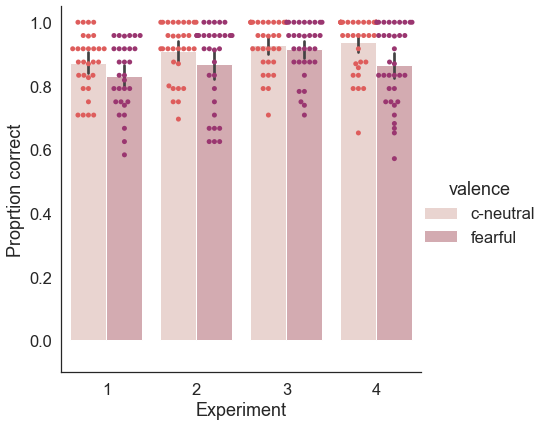

In [6]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="ExpNum", y="Total_acc", hue="valence", data=AB3,
 height=6, kind="bar", palette=sns.cubehelix_palette())
g = sns.swarmplot(x="ExpNum", y="Total_acc", hue="valence", data=AB3, palette = "flare", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('Experiment')
#plt.title('AB3 Performance')
plt.show()

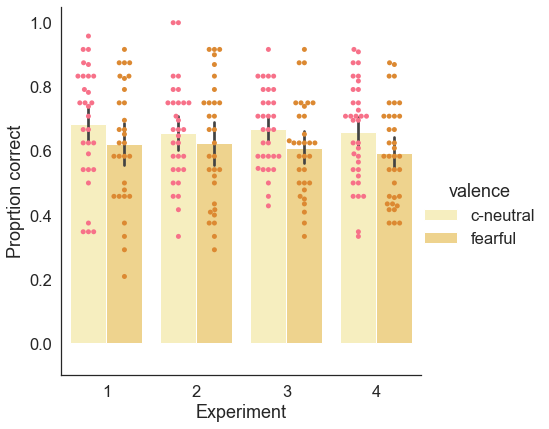

In [7]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="ExpNum", y="Total_acc", hue="valence", data=BC,
 height=6, kind="bar", palette=sns.color_palette("YlOrBr"))
g = sns.swarmplot(x="ExpNum", y="Total_acc", hue="valence", data=BC, palette = sns.color_palette("husl", 10) , dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('Experiment')
#plt.title('BC Performance')
plt.show()

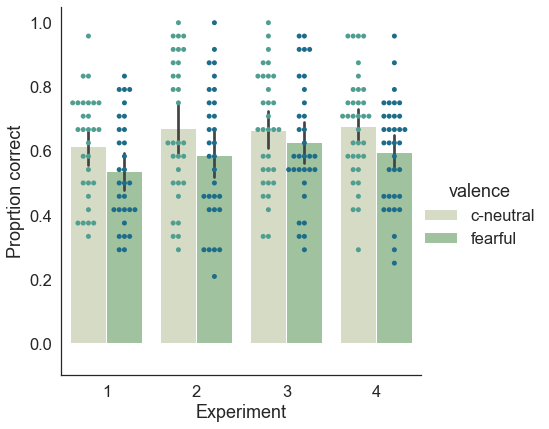

In [8]:
sns.set(font_scale = 1.5)
sns.set_style(style='white')
g = sns.catplot(x="ExpNum", y="Total_acc", hue="valence", data=AC,
 height=6, kind="bar", palette=sns.cubehelix_palette(start=.5, rot=-.75))
g = sns.swarmplot(x="ExpNum", y="Total_acc", hue="valence", data=AC, palette = "crest", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('Experiment')
#plt.title('AC Performance')
plt.show()

## BCXY comparison for sequence

(-0.1, 1.05)

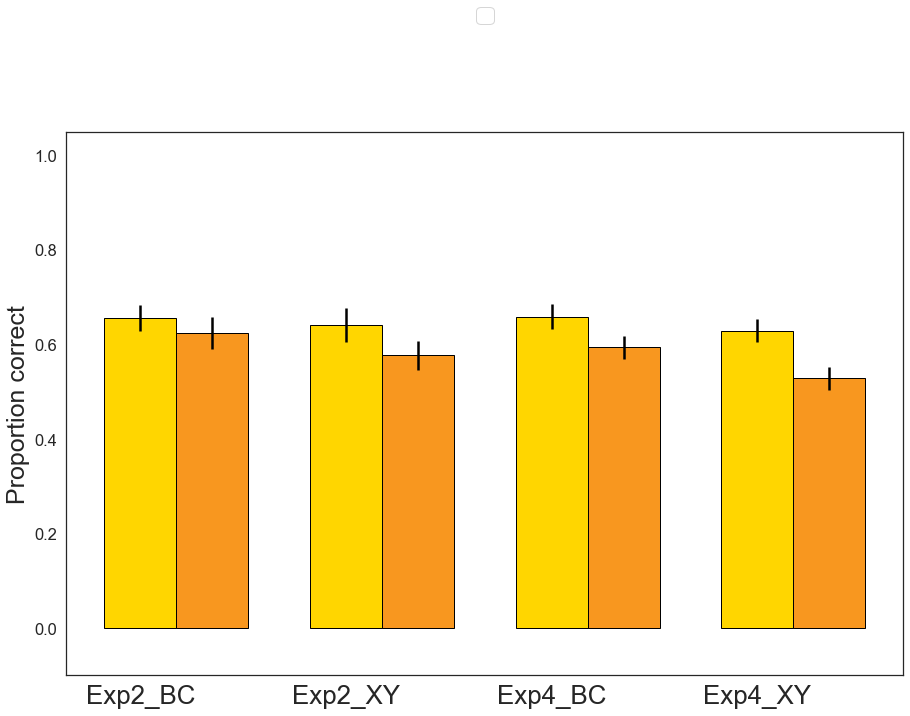

In [66]:
red = '#f8971f' #UT brand orange
blue = '#ffd600' #UT brand yellow (xkcd)

####FOR BAR GRAPHS####

exp2_BC = exp2.loc[exp2['Test'] == 'BC']
exp2_XY = exp2.loc[exp2['Test'] == 'XY']
exp4_BC = exp4.loc[exp4['Test'] == 'BC']
exp4_XY = exp4.loc[exp4['Test'] == 'XY']

neu_exp2_BC = exp2_BC.loc[exp2_BC['condition'] == 'Avg_BC']
neu_exp2_XY = exp2_XY.loc[exp2_XY['condition'] == 'Avg_XY']
neu_exp4_BC = exp4_BC.loc[exp4_BC['condition'] == 'Avg_BC']
neu_exp4_XY = exp4_XY.loc[exp4_XY['condition'] == 'Avg_XY']

emo_exp2_BC = exp2_BC.loc[exp2_BC['condition'] == 'Avg_BC_emo']
emo_exp2_XY = exp2_XY.loc[exp2_XY['condition'] == 'Avg_XY_emo']
emo_exp4_BC = exp4_BC.loc[exp4_BC['condition'] == 'Avg_BC_emo']
emo_exp4_XY = exp4_XY.loc[exp4_XY['condition'] == 'Avg_XY_emo']

neuBC_mean2 = np.mean(neu_exp2_BC['Total_acc'])
emoBC_mean2 = np.mean(emo_exp2_BC['Total_acc'])
neuXY_mean2 = np.mean(neu_exp2_XY['Total_acc'])
emoXY_mean2 = np.mean(emo_exp2_XY['Total_acc'])

neuBC_mean4 = np.mean(neu_exp4_BC['Total_acc'])
emoBC_mean4 = np.mean(emo_exp4_BC['Total_acc'])
neuXY_mean4 = np.mean(neu_exp4_XY['Total_acc'])
emoXY_mean4 = np.mean(emo_exp4_XY['Total_acc'])

neuBC_std2 = stats.sem(neu_exp2_BC['Total_acc'])
emoBC_std2 = stats.sem(emo_exp2_BC['Total_acc'])
neuXY_std2 = stats.sem(neu_exp2_XY['Total_acc'])
emoXY_std2 = stats.sem(emo_exp2_XY['Total_acc'])

neuBC_std4 = stats.sem(neu_exp4_BC['Total_acc'])
emoBC_std4 = stats.sem(emo_exp4_BC['Total_acc'])
neuXY_std4 = stats.sem(neu_exp4_XY['Total_acc'])
emoXY_std4 = stats.sem(emo_exp4_XY['Total_acc'])

neutral_means = [neuBC_mean2, neuXY_mean2, neuBC_mean4, neuXY_mean4]
emotional_means = [emoBC_mean2, emoXY_mean2, emoBC_mean4, emoXY_mean4]

neutral_sems = [neuBC_std2, neuXY_std2, neuBC_std4, neuXY_std4]
emotional_sems = [emoBC_std2, emoXY_std2, emoXY_std4, emoXY_std4]

fig, ax = plt.subplots(figsize=(15, 10))
exps = ['Exp2_BC', 'Exp2_XY', 'Exp4_BC', 'Exp4_XY' ]
##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(4)  # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
rects1 = ax.bar(ind, neutral_means, width,
    color= blue,
    edgecolor= "black",
    yerr=neutral_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
rects2 = ax.bar(ind+width, emotional_means, width,
    color= red,
    edgecolor= "black",
    yerr=emotional_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))


ax.set_xticks([0,1,2,3])
_ = ax.set_xticklabels(exps, fontsize='x-large')
#Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:4], labels[0:4],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
#lgd.legendHandles[0]._sizes = [80]
#lgd.legendHandles[1]._sizes = [80]
#ax.set_xlabel('Experiment', fontsize = 15)
ax.set_ylabel('Proportion correct', fontsize =25)
plt.ylim(-0.1, 1.05)


In [55]:
rects4

<BarContainer object of 2 artists>